In [93]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime

# Presentation of Data

In [94]:
df = pd.read_csv("./startup_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   738 non-null    object 
 1   state_code           738 non-null    object 
 2   latitude             738 non-null    float64
 3   longitude            738 non-null    float64
 4   zip_code             738 non-null    object 
 5   city                 738 non-null    object 
 6   name                 738 non-null    object 
 7   foundation_date      738 non-null    object 
 8   first_funding_date   738 non-null    object 
 9   last_funding_date    738 non-null    object 
 10  first_funding_age    738 non-null    float64
 11  last_funding_age     738 non-null    float64
 12  first_milestone_age  609 non-null    float64
 13  last_milestone_age   609 non-null    float64
 14  connections          738 non-null    int64  
 15  funding_rounds       738 non-null    int

In [95]:
df.head()

,id,state_code,latitude,longitude,zip_code,city,name,foundation_date,first_funding_date,last_funding_date,...,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
0,c:6669,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1/1/2007,4/1/2009,1/1/2010,...,0,0,1,0,0,0,0,1.0000,0,acquired
1,c:16283,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1/1/2000,2/14/2005,12/28/2009,...,0,0,0,0,1,1,1,4.7500,1,acquired
2,c:65620,CA,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,c:42668,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1/1/2002,2/17/2005,4/25/2007,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,c:65806,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,8/1/2010,8/1/2010,4/1/2012,...,0,0,0,0,0,0,0,1.0000,1,closed


# Presentation of Statistics

In [96]:
df.describe()

,latitude,longitude,first_funding_age,last_funding_age,first_milestone_age,last_milestone_age,connections,funding_rounds,total_funding,milestones,...,is_ecommerce,is_biotech,is_consulting,is_othercategory,roundA,roundB,roundC,roundD,avg_group_size,in_Top500
count,738.000000,738.000000,738.000000,738.000000,609.000000,609.000000,738.000000,738.000000,7.380000e+02,738.000000,...,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,38.558655,-102.814267,2.232637,3.925533,3.094282,4.803812,7.704607,2.307588,2.738180e+07,1.830623,...,0.025745,0.039295,0.002710,0.310298,0.513550,0.397019,0.231707,0.105691,2.795865,0.814363
std,3.669119,22.456789,2.541843,3.014443,3.004926,3.271966,7.455304,1.395465,2.117322e+08,1.348313,...,0.158482,0.194429,0.052023,0.462929,0.500155,0.489612,0.422209,0.307650,1.828125,0.389077
min,26.052461,-122.756956,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.200000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,37.391580,-122.192169,0.583600,1.684900,1.002700,2.438400,3.000000,1.000000,3.000000e+06,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,37.779281,-118.287233,1.501350,3.494500,2.646600,4.487700,5.000000,2.000000,1.000000e+07,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.450000,1.000000
75%,40.730646,-76.850588,3.502725,5.555475,4.682200,6.791800,10.000000,3.000000,2.465264e+07,3.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.666700,1.000000
max,54.983201,-1.574631,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [97]:
numerics = ['int64', 'float64']
df.select_dtypes(include=numerics).skew()

latitude                0.164929
longitude               0.716956
first_funding_age       2.290604
last_funding_age        1.183243
first_milestone_age     1.072755
last_milestone_age      0.856159
connections             2.441284
funding_rounds          1.407487
total_funding          26.187512
milestones              0.616888
in_CA                  -0.032591
in_NY                   2.415830
in_MA                   2.718111
in_TX                   4.339434
in_otherstate           1.274353
is_software             1.716018
is_web                  1.873596
is_mobile               2.943025
is_enterprise           3.103951
is_advertising          3.446875
is_gamesvideo           3.945957
is_ecommerce            6.001239
is_biotech              4.751940
is_consulting          19.170183
is_othercategory        0.821799
roundA                 -0.054331
roundB                  0.421807
roundC                  1.274353
roundD                  2.570324
avg_group_size          1.904079
in_Top500 

# Removing Unnessesery Attributes 

The category attribute include all the other category type attributes like "is_typeOfCategory" therefore we chose to remove those attributes because we only need the category attribute

In [98]:
df = df.drop(['is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
             'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory'] , axis='columns')

Same as category the state_code attribute include all the other city type attributes like "is_statecode" therefore we removed those attributes

In [99]:
df = df.drop(['in_CA', 'in_TX', 'in_NY', 'in_MA', 'in_otherstate'] , axis='columns')


Now, funding_age and funding_date are the same things given the foundation date, so we will drop the funding date attributes because working with the age from when the startup was founded does not affected by the current date

In [100]:
df = df.drop(['first_funding_date', 'last_funding_date'] , axis='columns')

We will drop the id and name attributes as they do not contribute any additional data about the startup.

In [101]:
df = df.drop(['id', 'name'], axis='columns')

We will drop thezip_code attribute as we have the latitude and longitude that pin point exactly to the wanted location

In [102]:
df = df.drop('zip_code', axis='columns')

# visualizations of data

we will present all the attributs distribution and fix the outliers in the next section

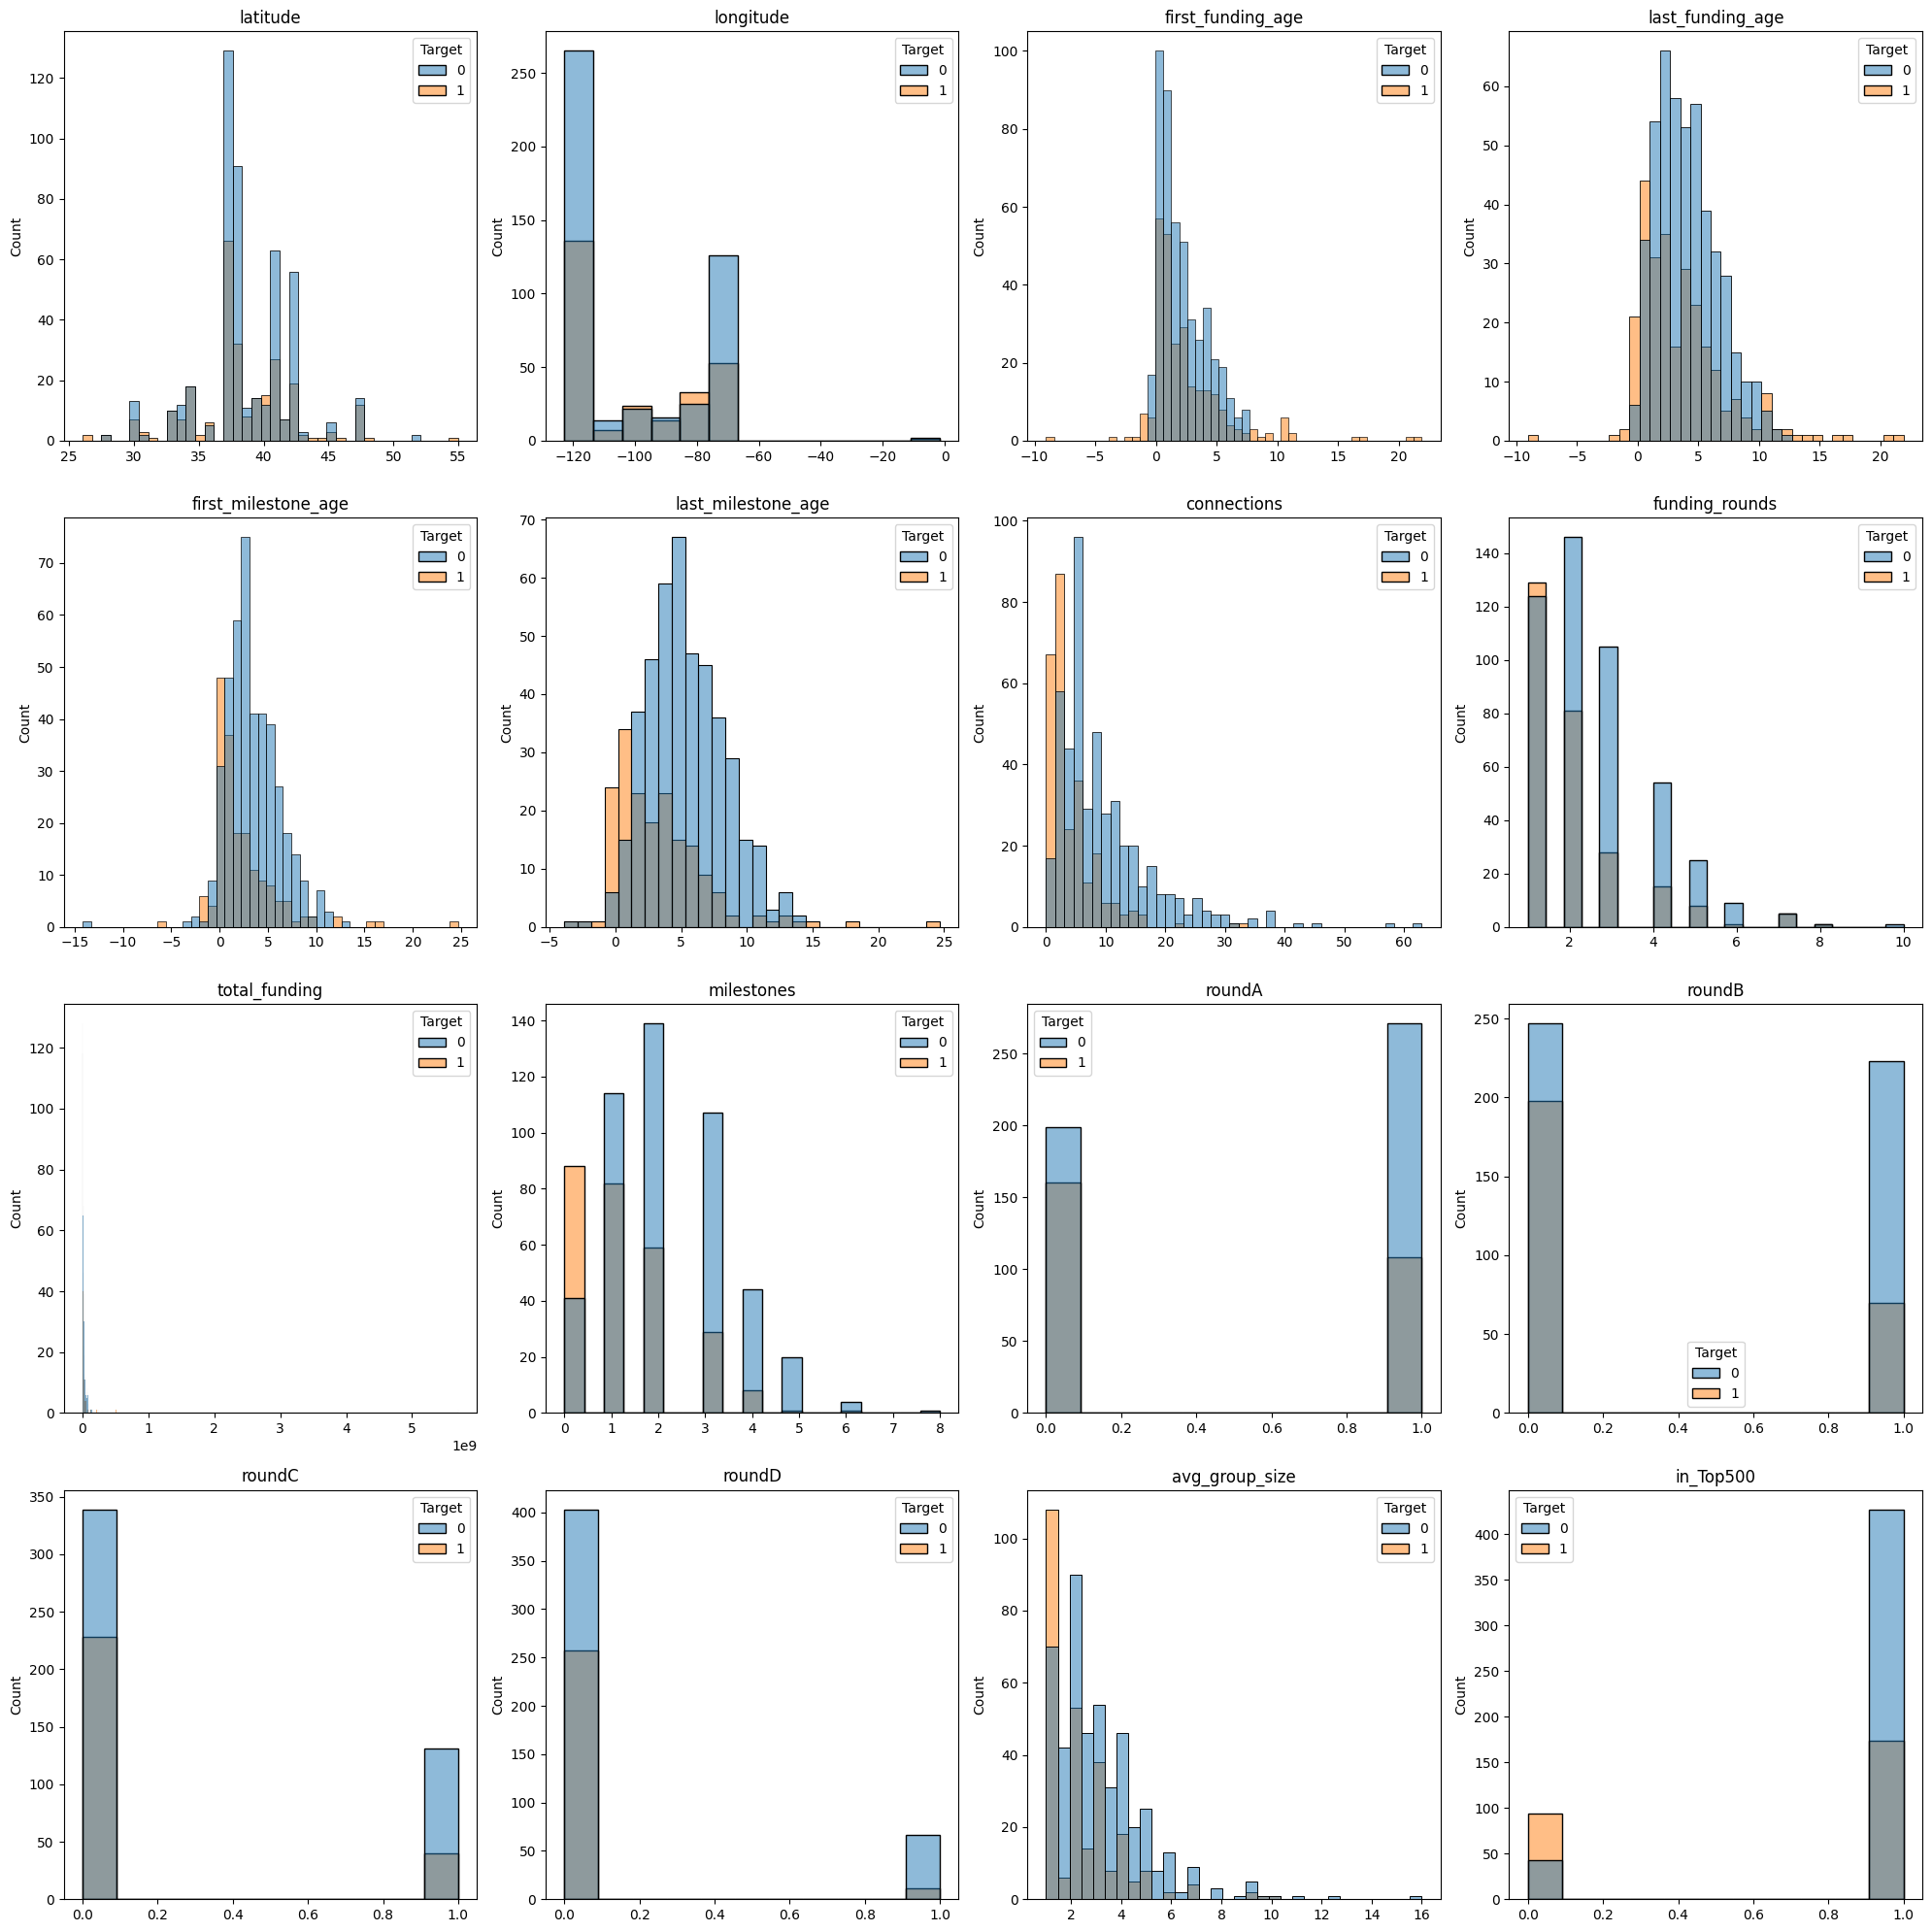

In [103]:
numerics = ['int64', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric['Target'] = df['Target'].astype('category').cat.codes

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = df_numeric.columns[:-1]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df_numeric[[col, 'Target']]  # select the data
    sns.histplot(data=data, x=col, hue='Target', fill=True, ax=ax)
    ax.set(title=f'{col}', xlabel=None)
    
fig.tight_layout()

# Data cleaning and Data reduction

We saw that the total founding attribute had a high skewness and by the graph of its distribution we saw that there was a small amount of very high values, so we dicided to remove this outliers

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 737
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_code           725 non-null    object 
 1   latitude             725 non-null    float64
 2   longitude            725 non-null    float64
 3   city                 725 non-null    object 
 4   foundation_date      725 non-null    object 
 5   first_funding_age    725 non-null    float64
 6   last_funding_age     725 non-null    float64
 7   first_milestone_age  597 non-null    float64
 8   last_milestone_age   597 non-null    float64
 9   connections          725 non-null    int64  
 10  funding_rounds       725 non-null    int64  
 11  total_funding        725 non-null    int64  
 12  milestones           725 non-null    int64  
 13  category             725 non-null    object 
 14  roundA               725 non-null    int64  
 15  roundB               725 non-null    int64  


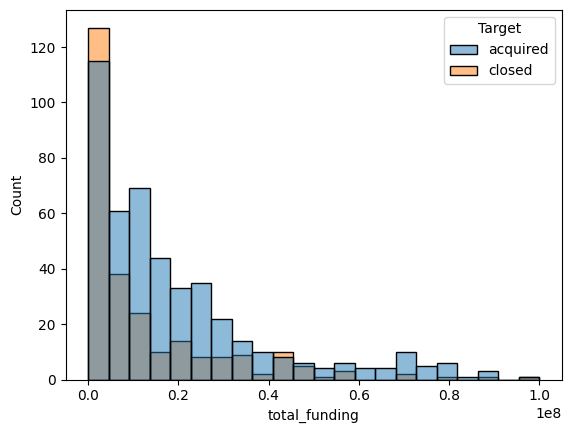

In [104]:
df = df.drop(df.loc[(df['total_funding']>1e8)].index)
sns.histplot(data=df, x='total_funding',  hue='Target')
df.info()

Now, we will just make sure that the last's ages are above the fisrt's ages and remove those who arent

In [105]:
df = df.drop(df.loc[df['last_funding_age'] < df['first_funding_age']].index)
df = df.drop(df.loc[df['last_milestone_age'] < df['first_milestone_age']].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 737
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_code           725 non-null    object 
 1   latitude             725 non-null    float64
 2   longitude            725 non-null    float64
 3   city                 725 non-null    object 
 4   foundation_date      725 non-null    object 
 5   first_funding_age    725 non-null    float64
 6   last_funding_age     725 non-null    float64
 7   first_milestone_age  597 non-null    float64
 8   last_milestone_age   597 non-null    float64
 9   connections          725 non-null    int64  
 10  funding_rounds       725 non-null    int64  
 11  total_funding        725 non-null    int64  
 12  milestones           725 non-null    int64  
 13  category             725 non-null    object 
 14  roundA               725 non-null    int64  
 15  roundB               725 non-null    int64  


We noticed with the describe function that there is no negitive data that doesn't make sence.
But we still have to check that there is no date's data that doesn't make sence.

In [106]:
invalid_rows = []   
date_columns = ['foundation_date']
for index, row in df.iterrows():
    for column in date_columns:
        try:
            date_value = pd.to_datetime(row[column], format='%d/%m/%Y', errors='raise')
        except ValueError:
            invalid_rows.append(index)
            break
df = df.drop(invalid_rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679 entries, 0 to 737
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_code           679 non-null    object 
 1   latitude             679 non-null    float64
 2   longitude            679 non-null    float64
 3   city                 679 non-null    object 
 4   foundation_date      679 non-null    object 
 5   first_funding_age    679 non-null    float64
 6   last_funding_age     679 non-null    float64
 7   first_milestone_age  560 non-null    float64
 8   last_milestone_age   560 non-null    float64
 9   connections          679 non-null    int64  
 10  funding_rounds       679 non-null    int64  
 11  total_funding        679 non-null    int64  
 12  milestones           679 non-null    int64  
 13  category             679 non-null    object 
 14  roundA               679 non-null    int64  
 15  roundB               679 non-null    int64  


we will check any attriutes

We will show a nice scatter plot of the map of the startups 

<Axes: xlabel='longitude', ylabel='latitude'>

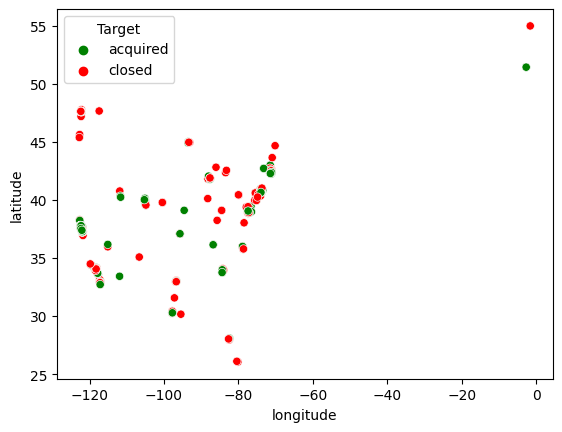

In [107]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Target', palette=["green", "red"])

We will remove the blue outlier we can see in approx. (0,50)

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 0 to 737
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_code           676 non-null    object 
 1   latitude             676 non-null    float64
 2   longitude            676 non-null    float64
 3   city                 676 non-null    object 
 4   foundation_date      676 non-null    object 
 5   first_funding_age    676 non-null    float64
 6   last_funding_age     676 non-null    float64
 7   first_milestone_age  557 non-null    float64
 8   last_milestone_age   557 non-null    float64
 9   connections          676 non-null    int64  
 10  funding_rounds       676 non-null    int64  
 11  total_funding        676 non-null    int64  
 12  milestones           676 non-null    int64  
 13  category             676 non-null    object 
 14  roundA               676 non-null    int64  
 15  roundB               676 non-null    int64  


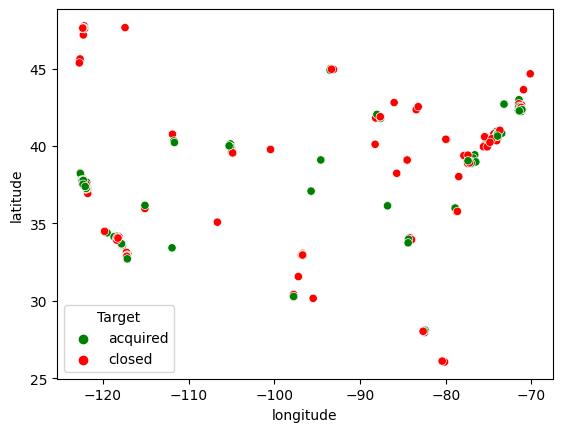

In [108]:
df = df.drop(df.loc[(df['latitude'] > 50) | (df['longitude'] > -60)].index)
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Target', palette=["green", "red"])
df.info()

We will check for abnormal values, by checking abnormality of 5 std

In [109]:
filtered_df = pd.DataFrame()
numerics = ['int64', 'float64']
df_numeric = df.select_dtypes(include=numerics)
col_list = df_numeric.columns
for col in col_list:
    col_mean = df[col].mean()
    col_std = df[col].std()
    lower_bound = col_mean - 5 * col_std
    upper_bound = col_mean + 5 * col_std
    column_filter = (df[col] > upper_bound) | (df[col] < lower_bound)
    column_filter &= ~df[col].isna()
    filtered_df = pd.concat([filtered_df, df[column_filter]], ignore_index=True)
filtered_df

,state_code,latitude,longitude,city,foundation_date,first_funding_age,last_funding_age,first_milestone_age,last_milestone_age,connections,...,total_funding,milestones,category,roundA,roundB,roundC,roundD,avg_group_size,in_Top500,Target
0,GA,34.070958,-84.274733,Alpharetta,1/1/1985,20.8055,20.8055,NaN,NaN,2,...,32000000,0,software,0,1,0,0,7.0000,1,closed
1,TX,30.161661,-95.471256,The Woodlands,1/1/1992,16.4192,16.4192,NaN,NaN,0,...,6000000,0,cleantech,0,1,0,0,3.0000,0,closed
2,CA,37.563905,-122.324688,San Mateo,4/10/1990,16.9863,16.9863,16.6630,18.3233,7,...,6000000,2,network_hosting,1,0,0,0,1.0000,1,closed
3,NC,35.780398,-78.639099,Raleigh,1/1/1984,21.8959,21.8959,24.6849,24.6849,1,...,8000000,1,software,0,0,0,0,2.0000,0,closed
4,GA,34.070958,-84.274733,Alpharetta,1/1/1985,20.8055,20.8055,NaN,NaN,2,...,32000000,0,software,0,1,0,0,7.0000,1,closed
5,NC,35.780398,-78.639099,Raleigh,1/1/1984,21.8959,21.8959,24.6849,24.6849,1,...,8000000,1,software,0,0,0,0,2.0000,0,closed
6,OR,45.520247,-122.674195,Portland,3/1/2011,0.5397,1.5014,-14.1699,2.2082,6,...,1975000,2,enterprise,0,0,0,0,3.0000,0,acquired
7,NC,35.780398,-78.639099,Raleigh,1/1/1984,21.8959,21.8959,24.6849,24.6849,1,...,8000000,1,software,0,0,0,0,2.0000,0,closed
8,NC,35.780398,-78.639099,Raleigh,1/1/1984,21.8959,21.8959,24.6849,24.6849,1,...,8000000,1,software,0,0,0,0,2.0000,0,closed
9,CA,37.764726,-122.394523,San Francisco,10/11/2004,0.9726,6.7534,5.2466,9.1534,57,...,45000000,8,news,1,1,1,1,4.6667,1,acquired


We noticed that its only a small portion of the data so we decided to delete it 

In [110]:
numerics = ['int64', 'float64']
df_numeric = df.select_dtypes(include=numerics)
col_list = df_numeric.columns
for col in col_list:
    col_mean = df[col].mean()
    col_std = df[col].std()
    lower_bound = col_mean - 5 * col_std
    upper_bound = col_mean + 5 * col_std
    column_filter = (df[col] <= upper_bound) & (df[col] >= lower_bound) | df[col].isna()
    df = df[column_filter]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 0 to 737
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state_code           666 non-null    object 
 1   latitude             666 non-null    float64
 2   longitude            666 non-null    float64
 3   city                 666 non-null    object 
 4   foundation_date      666 non-null    object 
 5   first_funding_age    666 non-null    float64
 6   last_funding_age     666 non-null    float64
 7   first_milestone_age  550 non-null    float64
 8   last_milestone_age   550 non-null    float64
 9   connections          666 non-null    int64  
 10  funding_rounds       666 non-null    int64  
 11  total_funding        666 non-null    int64  
 12  milestones           666 non-null    int64  
 13  category             666 non-null    object 
 14  roundA               666 non-null    int64  
 15  roundB               666 non-null    int64  


# Data transformation

we will convet the date's data that does make sence into integers which represent how many nanoseconds passed sence 1/1/1970

In [111]:
df['foundation_date'] = pd.to_datetime(df['foundation_date'], format='%d/%m/%Y').astype('int64')

We noticed that the missing milestone age values are becuase there are no milestones so we dicided to fill them with zeros so PCA will work on them and we will still be able to classify which startups didn't have milestones 

In [112]:
df['first_milestone_age'] = df['first_milestone_age'].fillna(0)
df['last_milestone_age'] = df['last_milestone_age'].fillna(0)

We will normalize the numeric attributes to values between 0 to 1 by min-max approach 

In [113]:
attributes_list = ['Target', 'category', 'city', 'state_code']
numerics = ['int64', 'float64']
new_df_numeric = df.select_dtypes(include=numerics)
normalized_df = (new_df_numeric - new_df_numeric.min()) / (new_df_numeric.max() - new_df_numeric.min())
print("size is :", normalized_df.shape)
for attr in attributes_list:
    normalized_df[attr] = df[attr]
print(normalized_df.shape)

size is : (666, 17)
(666, 21)


In the category attribute there are many type of categorys so we chose to leave only the 8 most common categories and the others convert to "other category"

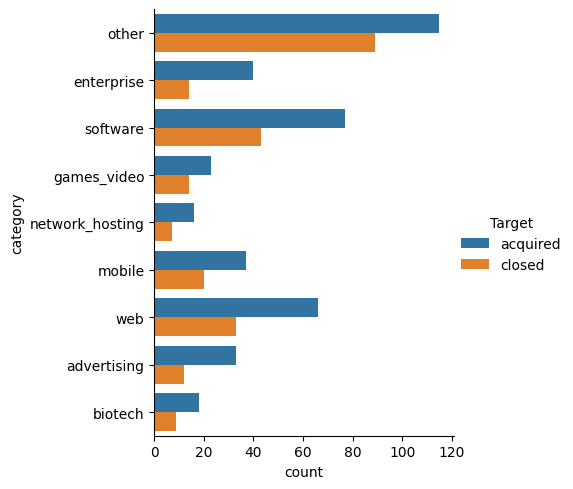

In [114]:
list1 = normalized_df['category'].value_counts().index.tolist()
normalized_df['category'].replace(list1[8:], 'other', inplace=True)
normalized_df['category'].value_counts()
sns.catplot(data=normalized_df, y='category', hue='Target', kind='count')

We changed the category attribute from string to int

In [115]:
normalized_df['category'] = pd.factorize(normalized_df['category'])[0]
normalized_df['category'].value_counts()

category
0    204
2    120
6     99
5     57
1     54
7     45
3     37
8     27
4     23
Name: count, dtype: int64

So as in the city and the state_code attributes there are many type of them so we chose to leave only the 10 most common state_codes and the 20 most common cities and convert the other to "other"

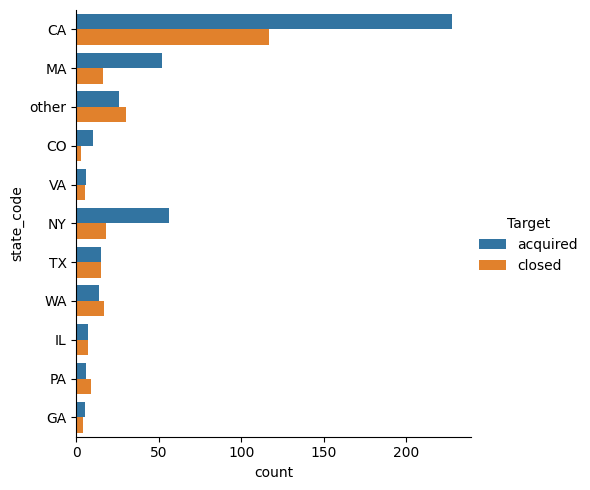

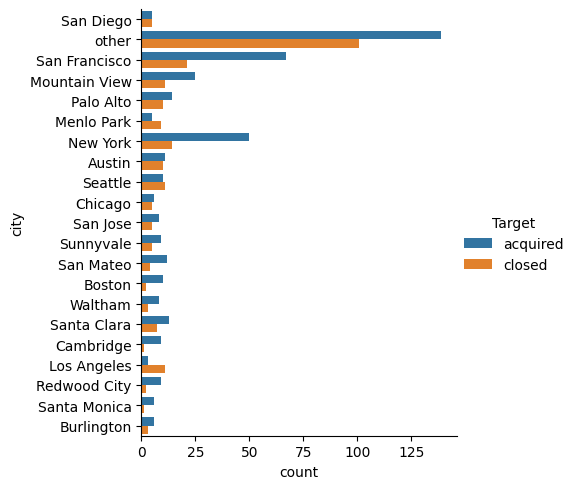

In [116]:
list1 = normalized_df['state_code'].value_counts().index.tolist()
normalized_df['state_code'].replace(list1[10:], 'other', inplace=True)
normalized_df['state_code'].value_counts()
sns.catplot(data=normalized_df, y='state_code', hue='Target', kind='count')

list1 = normalized_df['city'].value_counts().index.tolist()
normalized_df['city'].replace(list1[20:], 'other', inplace=True)
normalized_df['city'].value_counts()
sns.catplot(data=normalized_df, y='city', hue='Target', kind='count')

We now changed the state code and the city attributes from string to int

In [117]:
normalized_df['state_code'] = pd.factorize(normalized_df['state_code'])[0]
normalized_df['city'] = pd.factorize(normalized_df['city'])[0]

In [118]:
normalized_df['state_code'].value_counts()
normalized_df['city'].value_counts()

city
1     240
2      88
6      64
3      36
4      24
8      21
7      21
15     20
12     16
5      14
17     14
11     14
10     13
13     12
14     11
9      11
18     11
0      10
16     10
20      9
19      7
Name: count, dtype: int64

We changed the Target attribute to be binary 1 and 0

In [119]:
normalized_df['Target'] = normalized_df['Target'].astype('category').cat.codes

We want to look again at all the statists of the attributes

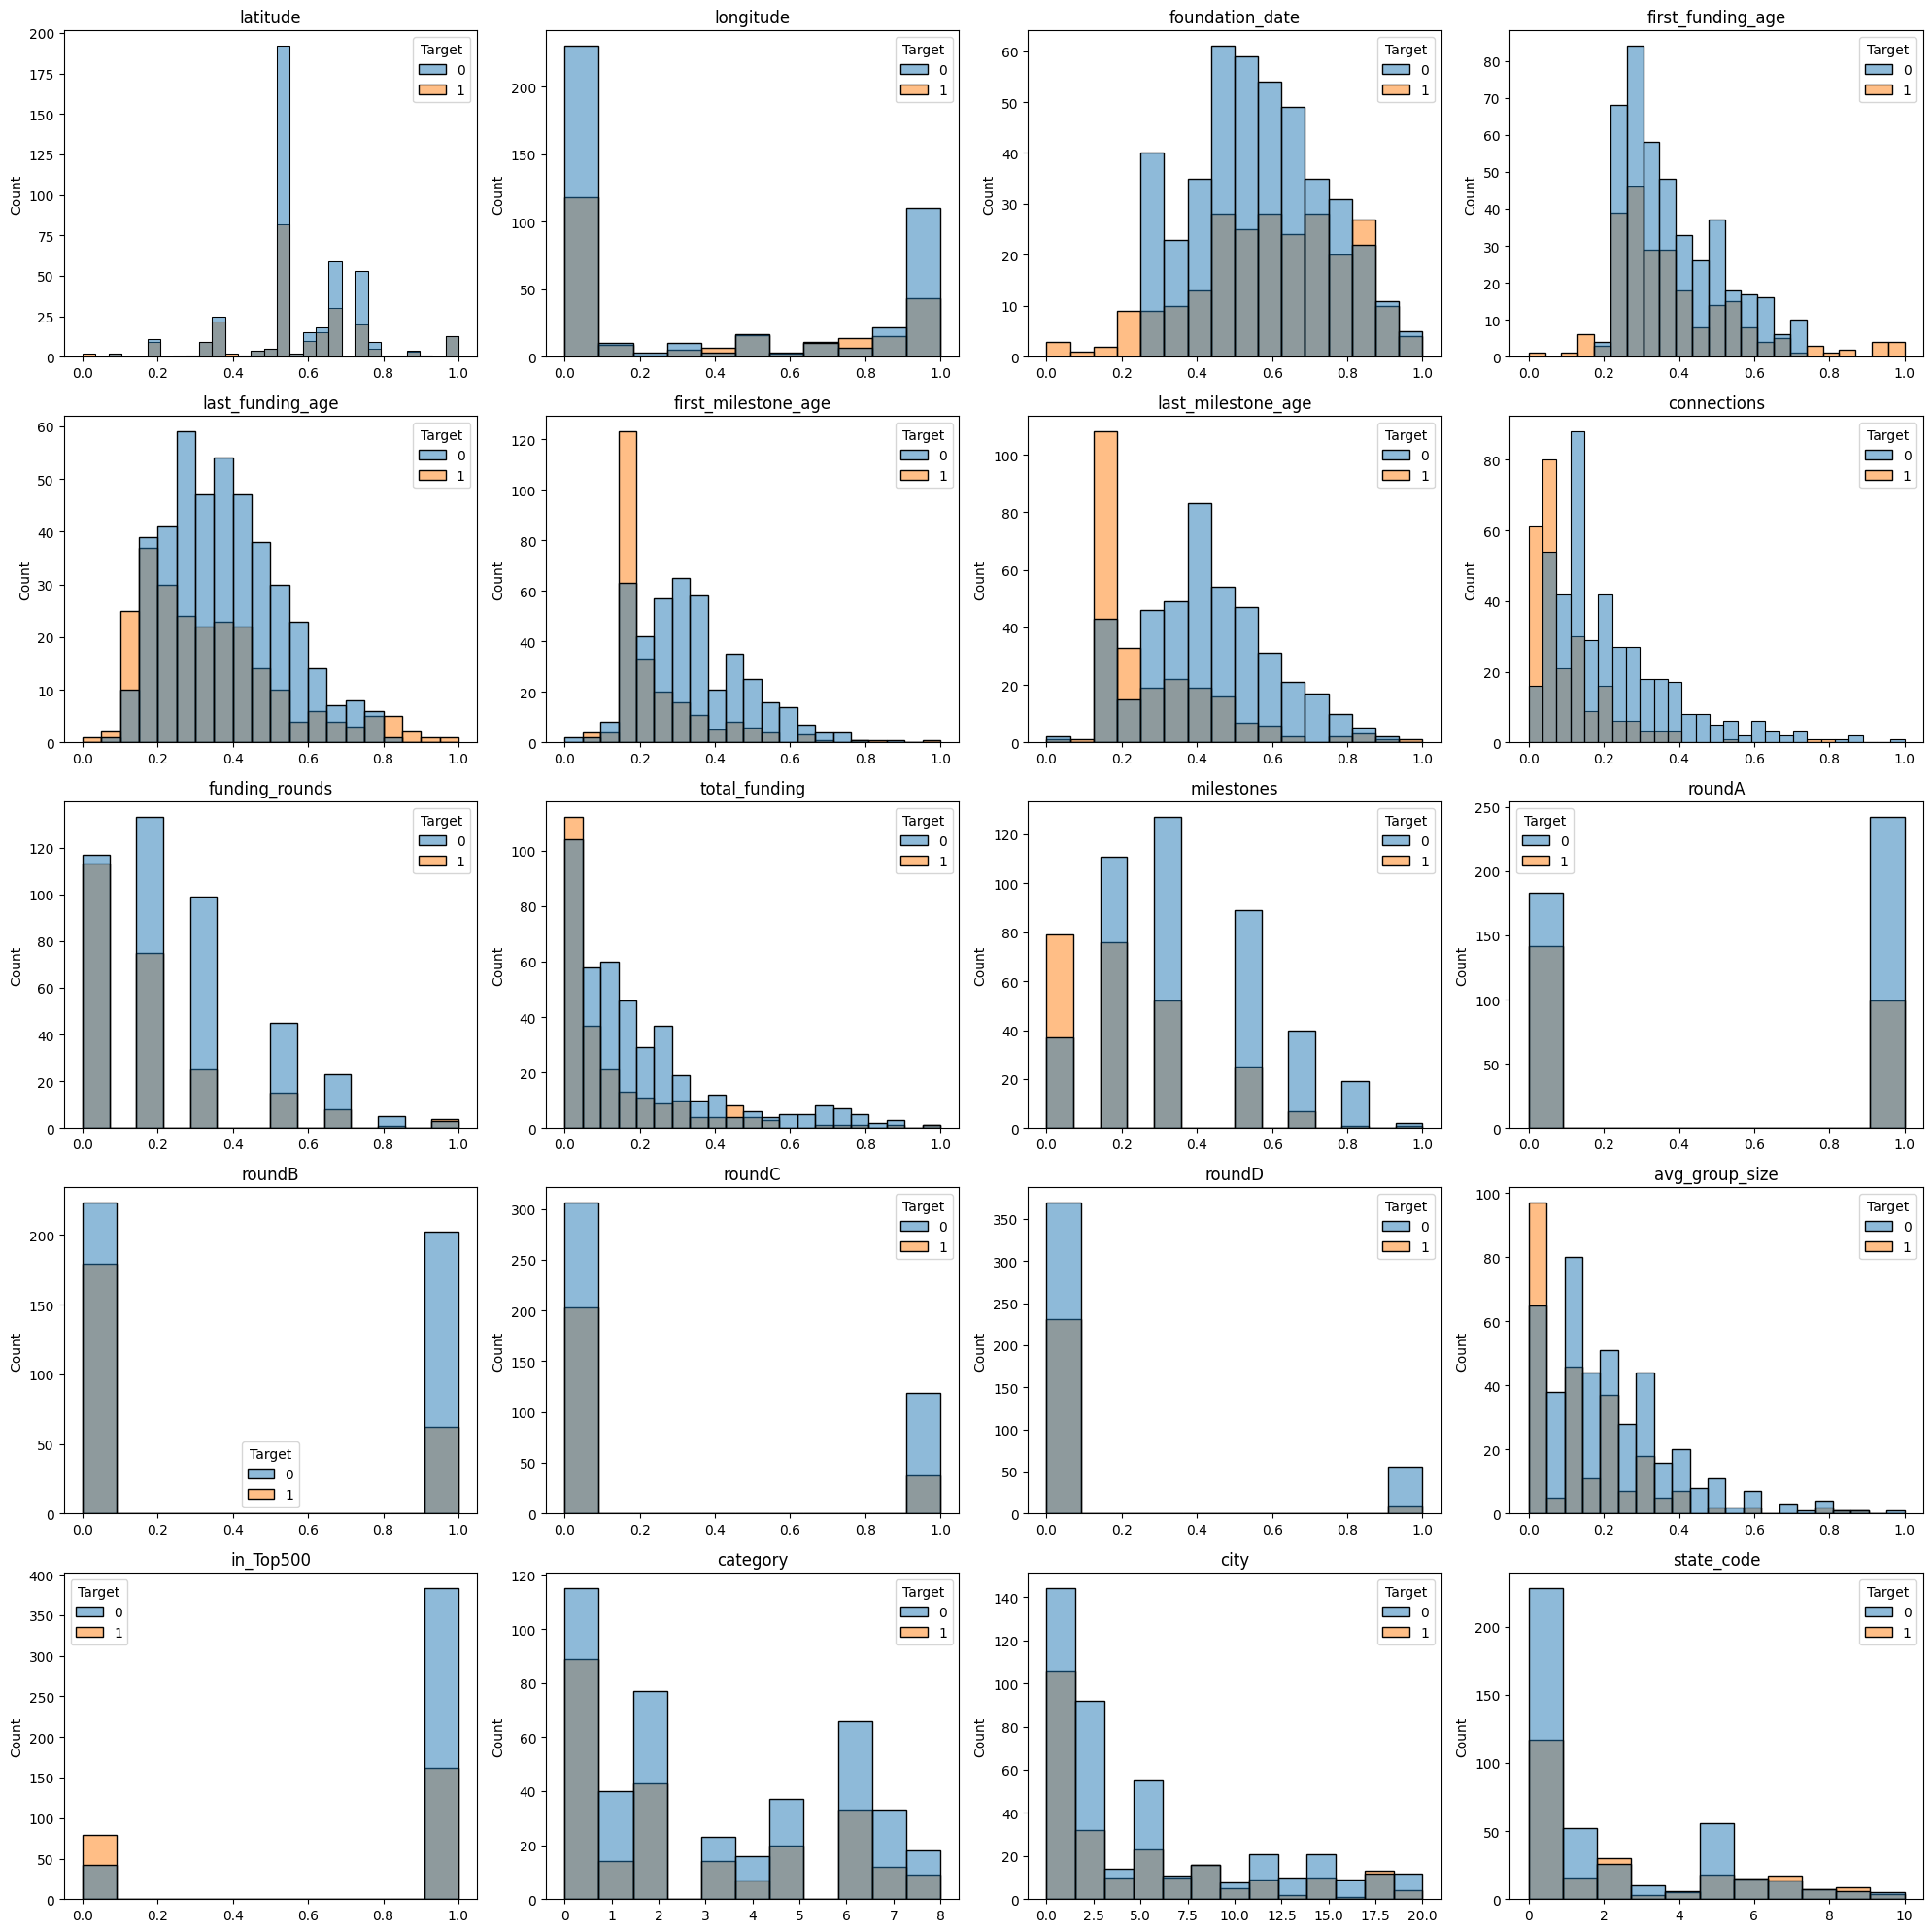

In [120]:
df_numeric = normalized_df.select_dtypes(include=numerics)
df_numeric['Target'] = normalized_df['Target'].astype('category').cat.codes

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = df_numeric.columns[:-1]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df_numeric[[col, 'Target']]  # select the data
    sns.histplot(data=data, x=col, hue='Target', fill=True, ax=ax)
    ax.set(title=f'{col}', xlabel=None)

###fig.delaxes(axes[18])  # delete the empty subplot
###fig.delaxes(axes[19])  # delete the empty subplot
fig.tight_layout()

In [121]:
normalized_df.to_csv('preprocessed.csv')

# Attributes correlations

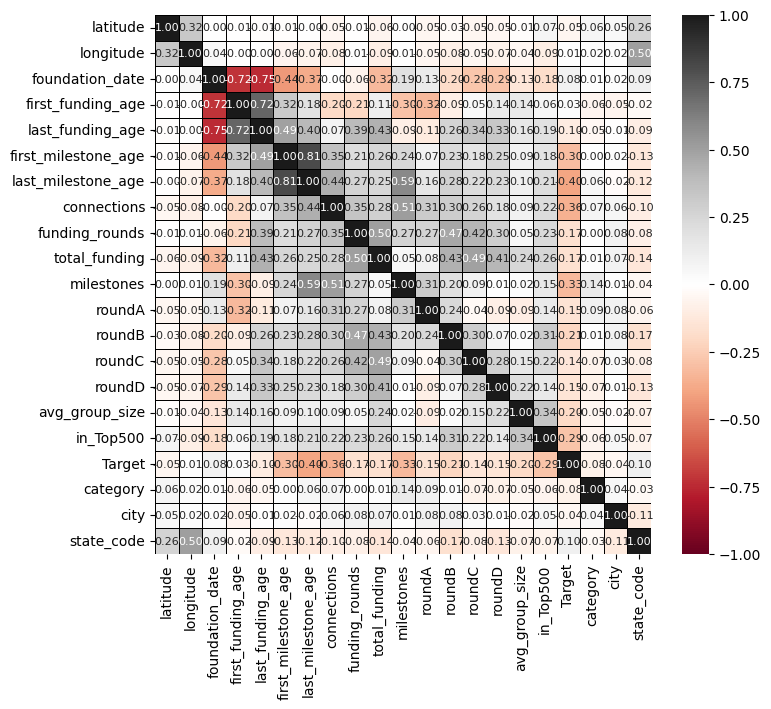

In [122]:
normalized_df.corr(method = 'pearson')
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.heatmap(normalized_df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= "RdGy", linewidths=0.5, linecolor='black', annot_kws={'fontsize':8}, fmt='.2f')

# Intresting relations visualizations

We want to see if having lots of connections affect the probability for the startup to success

<Axes: xlabel='Target', ylabel='connections'>

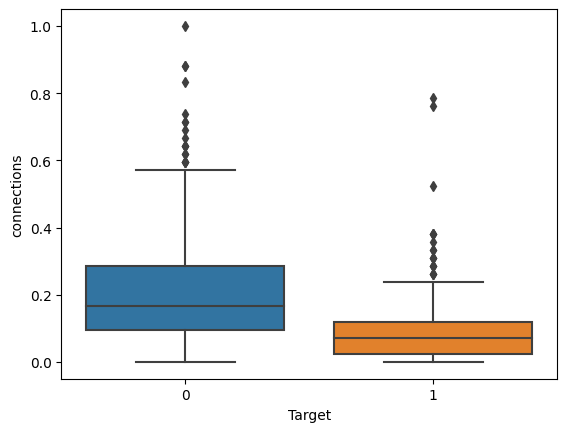

In [123]:
sns.boxplot(data=normalized_df, x="Target", y="connections")

We saw surprisingly high corraltion between milestone and connnection atrribute

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000001DEF9DB9090>>

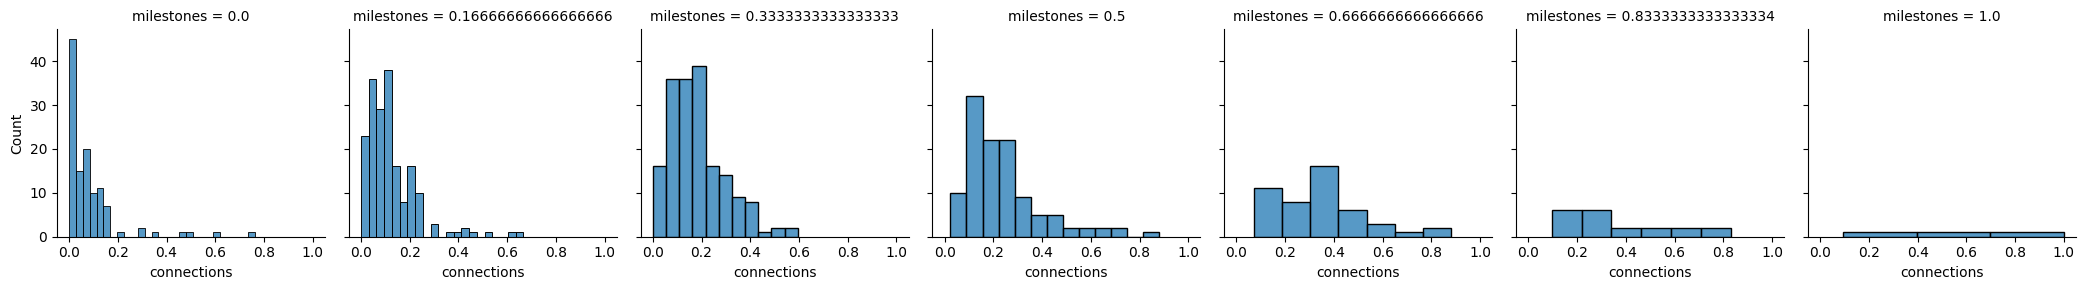

In [124]:
grid = sns.FacetGrid(normalized_df, col="milestones")
grid.map(sns.histplot, "connections")
grid.add_legend

We saw as expect high corraltion between funding_rounds and total_funding

<Axes: xlabel='funding_rounds', ylabel='total_funding'>

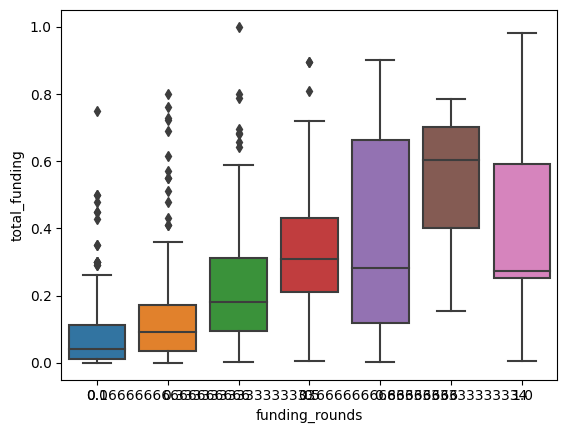

In [125]:
sns.boxplot(data=normalized_df, x='funding_rounds', y='total_funding')

We saw as expected that there was a corraltion between the ages attributes so we will show th in distribution graphsere distrbit

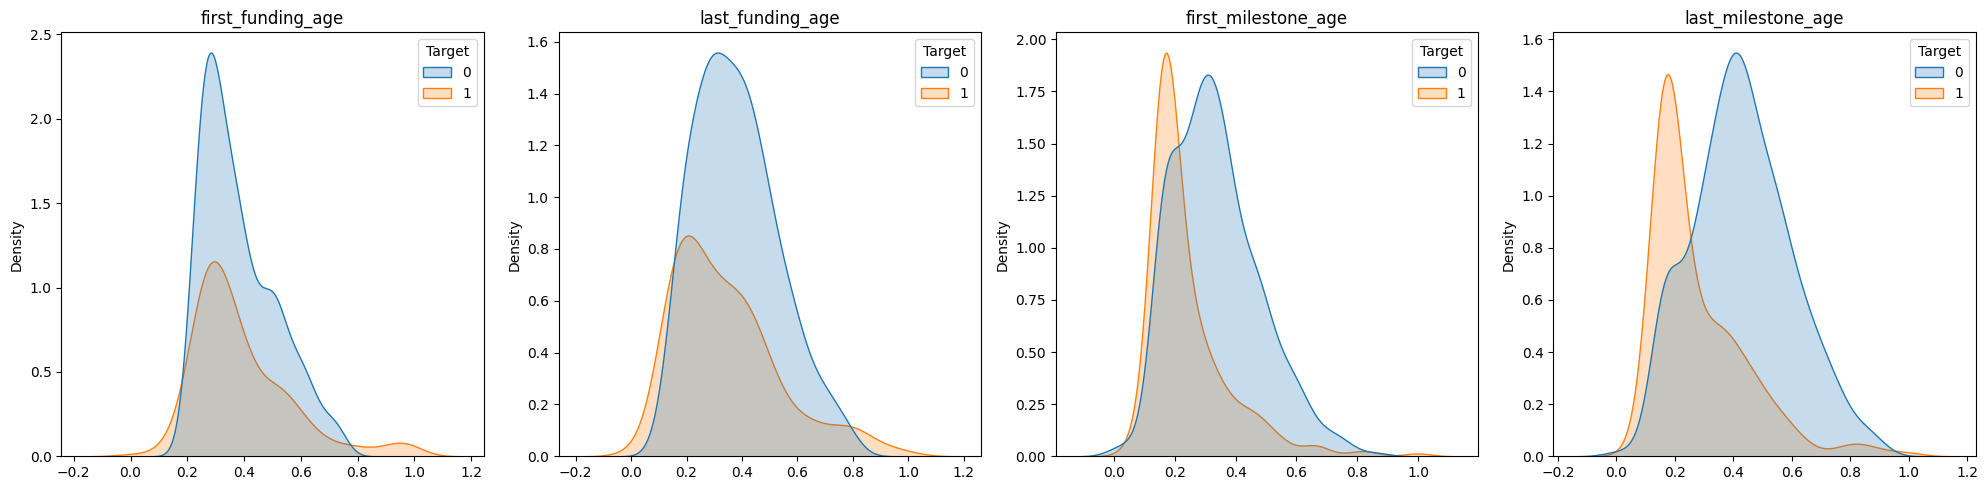

In [126]:
df_ages = normalized_df[["first_funding_age", "last_funding_age", "first_milestone_age", "last_milestone_age", "Target"]]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = df_ages.columns[:-1]  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = df_ages[[col, 'Target']]  # select the data
    sns.kdeplot(data=data, x=col, hue='Target', fill=True, ax=ax)
    ax.set(title=f'{col}', xlabel=None)

fig.tight_layout()

# PCA

We will do the PCA algorithm and show its results in a graph

In [127]:
pca = PCA(n_components = 0.99, svd_solver = 'full') 
pca.fit(normalized_df, y='Target')
df2 = pd.DataFrame(pca.transform(normalized_df))

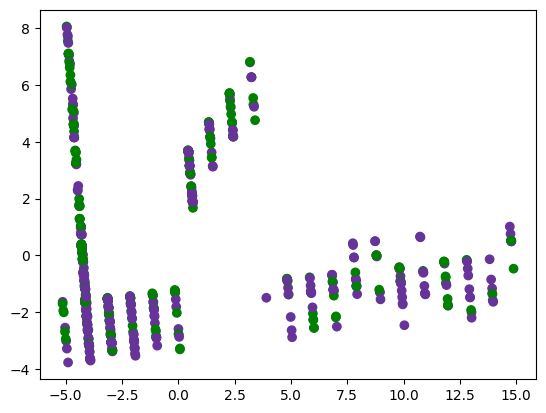

In [128]:
colordict = {0: 'rebeccapurple', 1: 'g'}
plt.scatter(df2[0], df2[1], c = normalized_df['Target'].map(colordict))

In [129]:
df2.to_csv('preprocessedPCA.csv')
df2

,0,1,2,3,4,5,6,7
0,-5.130808,-1.631728,-3.222186,-0.595269,0.072692,-0.651744,-0.563267,-0.942833
1,-4.090723,-1.938417,-2.341251,0.866759,1.133273,0.105493,0.178869,-0.016602
2,-4.063805,-2.185335,-1.371655,0.767476,1.061708,0.104457,0.154082,0.014648
3,-3.057089,-2.268133,-0.381641,-0.913108,0.111462,0.236636,0.053211,0.390044
4,-2.026423,-2.470543,0.569239,-0.287868,0.355065,0.651820,-0.514132,0.575563
...,...,...,...,...,...,...,...,...
661,-4.542435,3.266710,-1.996649,-0.619446,0.248962,0.204535,-0.176731,-0.035121
662,6.889688,-1.190886,-1.388528,-0.188008,-0.545941,-0.454656,0.299539,0.231160
663,2.277164,5.714384,-1.534408,-0.230517,-0.664637,0.363170,0.554428,0.563400
664,-4.787005,6.355072,1.915155,-0.576299,0.207028,0.242830,-0.071680,0.251722
